In [2]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
import sys
from sklearn.linear_model import LinearRegression

In [475]:
import skimage.data
import matplotlib.image as mpimg 
img=skimage.data.chelsea()
img=mpimg.imread('data/cat.jpg')

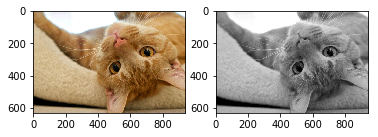

In [476]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(skimage.color.rgb2gray(img),cmap=plt.cm.gray)

In [477]:
igrey=skimage.color.rgb2gray(img)

In [478]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.21, 0.72, 0.07])

In [479]:
def showlab(lab):
    return (lab+[0,128,128])/[100,255,255]

In [480]:
ilab=skimage.color.rgb2lab(img)

In [481]:
ilab1=(ilab+[0,128,128])/[100,255,255]
ilab2=ilab1*[100,255,255]-[0,128,128]

In [482]:
igrey1=igrey*[100]

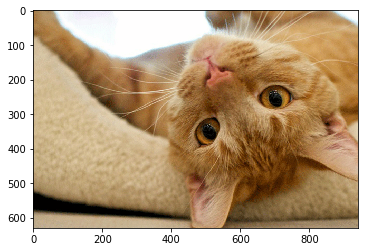

In [483]:
plt.imshow(skimage.color.lab2rgb(ilab2))

In [484]:
split=500
limg=img[:,:split,:]
rimg=img[:,split:,:]
limg=ilab[:,:split,:]
rimg=ilab[:,split:,:]


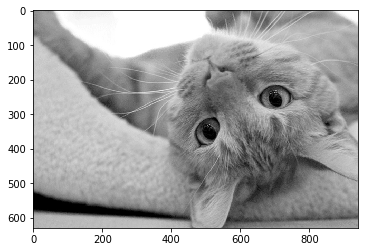

In [485]:
plt.imshow(ilab1[:,:,0],cmap=plt.cm.gray)

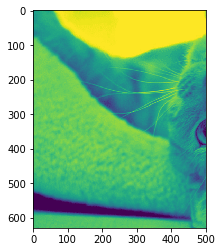

In [486]:
plt.imshow(limg[:,:,0])

In [487]:
grey3x3=[]
a3x3=[]
b3x3=[]
for row in range(limg.shape[0]-2):
    for col in range(limg.shape[1]-2):
        grey3x3.append(limg[row:row+3,col:col+3,0])
        a3x3.append(limg[row:row+3,col:col+3,1])
        b3x3.append(limg[row:row+3,col:col+3,2])
grey3x3=np.array(grey3x3)
a3x3=np.array(a3x3)
b3x3=np.array(b3x3)

inputX=grey3x3.reshape((grey3x3.shape[0],9))

y_a=limg[:,:,1][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)
y_b=limg[:,:,2][1:limg.shape[0]-1,1:limg.shape[1]-1].reshape(-1)

In [488]:
limg_edge=limg[1:limg.shape[0]-1,1:limg.shape[1]-1,:]
rimg_edge=rimg[1:rimg.shape[0]-1,1:rimg.shape[1]-1,:]

In [489]:
grey3x3=[]
a3x3=[]
b3x3=[]
for row in range(rimg.shape[0]-2):
    for col in range(rimg.shape[1]-2):
        grey3x3.append(rimg[row:row+3,col:col+3,0])
        a3x3.append(rimg[row:row+3,col:col+3,1])
        b3x3.append(rimg[row:row+3,col:col+3,2])
grey3x3=np.array(grey3x3)
a3x3=np.array(a3x3)
b3x3=np.array(b3x3)

test_X=grey3x3.reshape((grey3x3.shape[0],9))

test_a=rimg[:,:,1][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)
test_b=rimg[:,:,2][1:rimg.shape[0]-1,1:rimg.shape[1]-1].reshape(-1)

In [490]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
activation_function = tanh
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
        
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None
                ):  
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        
        self.no_of_hidden_nodes = no_of_hidden_nodes
            
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    
        
    
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural 
        network with optional bias nodes"""
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes + bias_node))
        
        
        
    def train(self, input_vector, target_vector):
        # input_vector and target_vector can be tuple, list or ndarray
        
        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [self.bias]) )
                                    
            
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.weights_in_hidden, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        #output_vector_hidden=output_vector1
        #print(output_vector_hidden.shape)

        
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        
        
        output_vector2 = np.dot(self.weights_hidden_out, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        #output_vector_network= output_vector2
        #print('output',output_vector_network)
        #output_errors =target_vector - output_vector_network
        output_errors =((target_vector - output_vector_network)**2).mean(axis=1).reshape((2,1))
        #print('error',output_errors)
        
        
        #print(self.weights_in_hidden)
        # update the weights:
        tmp = output_errors * (1-output_vector_network**2) #* (1.0 - output_vector_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_out += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.weights_hidden_out.T, output_errors)
        #print(hidden_errors.shape)
        #print(hidden_errors)
        # update the weights:
        tmp = hidden_errors * (1- output_vector_hidden**2)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:]     # ???? last element cut off, ???
        else:
            x = np.dot(tmp, input_vector.T)
        self.weights_in_hidden += self.learning_rate * x
        
       
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [1]) )
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_in_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, [[1]]) )
            
        output_vector = np.dot(self.weights_hidden_out, output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            
    

[[251.99407558 251.9940677  251.99399561 251.99407032 251.99406373
  251.99406767 251.99407419 251.99407048 251.9940706  251.99407609]
 [ 49.29070368  49.29076093  49.29125264  49.29074325  49.29079042
   49.29076402  49.29071858  49.29074458  49.29074347  49.29070656]]


/Users/ciuji/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:993: UserWarning: Color data out of range: Z < 0 in 4003 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


2-norm: 15229.517301023461


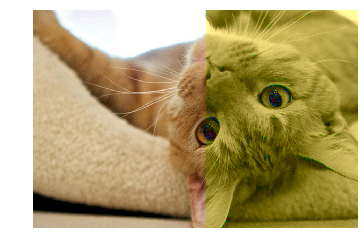

In [582]:
simple_network = NeuralNetwork(no_of_in_nodes=9, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=6,
                               learning_rate=0.05,
                               bias=None)
#data=[[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9,9],[10,10]]
for i in range(50):
    for _ in range(2):
        #print(inputX[i])
        #print(np.array([[y_a[i]],[y_b[i]]]).shape)
        simple_network.train(inputX[i],np.array([y_a[i],y_b[i]])/128)
        #simple_network.train(data[i],[1,0])

        

pred=simple_network.run(test_X)*255
print(pred[:,:10])

pred_a=pred[0].reshape(rimg.shape[0]-2,rimg.shape[1]-2).astype('int8')
pred_b=pred[1].reshape(rimg.shape[0]-2,rimg.shape[1]-2).astype('int8')


pred_rimg=np.array([rimg_edge[:,:,0],pred_a,pred_b])

pred_rimg=pred_rimg.transpose((1,2,0))

compare_img=np.append(limg_edge,pred_rimg,axis=1)
plt.axis('off')

plt.imshow(skimage.color.lab2rgb(compare_img))
true_rimg=np.array([rimg_edge[:,:,0],rimg_edge[:,:,1],rimg_edge[:,:,2]])
true_rimg=true_rimg.transpose((1,2,0))
print("2-norm:",np.linalg.norm(pred_rimg-true_rimg))

In [536]:
np.linalg.norm(true_rimg-pred_rimg)

21114.9827830109

In [571]:
pred_b

array([[-2, -2, -2, ..., -2, -2, -2],
       [-2, -2, -2, ..., -2, -2, -2],
       [-2, -2, -2, ..., -2, -2, -2],
       ...,
       [-2, -2, -2, ..., -2, -2, -2],
       [-2, -2, -2, ..., -2, -2, -2],
       [-2, -2, -2, ..., -2, -2, -2]], dtype=int8)

In [578]:
ilab[:,:,1]*10000

array([[ 1.31355360e+05,  9.80801177e+04,  1.25464510e+05, ...,
        -2.45493786e+01, -2.45493786e+01, -2.45493786e+01],
       [ 7.81916013e+04,  1.22706124e+05,  7.91032126e+04, ...,
        -2.45493786e+01, -2.45493786e+01, -2.45493786e+01],
       [ 1.43566482e+05,  1.05606328e+05,  1.04320614e+05, ...,
        -2.45493786e+01, -2.45493786e+01, -2.45493786e+01],
       ...,
       [ 1.89236671e+04,  3.53055993e+03,  2.98199521e+04, ...,
         2.68797077e+04,  6.03534509e+04, -9.40848321e+03],
       [ 1.67039529e+04,  3.48120414e+03,  6.62980909e+03, ...,
         4.32184267e+04,  5.75537999e+04,  2.85612351e+04],
       [ 1.67863516e+03,  4.63193694e+04,  4.19773845e+03, ...,
         4.62639749e+04,  8.73962122e+04,  3.72783712e+03]])